In [98]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pickle
plt.rcParams.update({'font.size': 15})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
def setup(ax,maticksize,xlim0,xlim1,ylim0,ylim1,notext=False):  
    ax.xaxis.set_major_locator(ticker.MultipleLocator(maticksize))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    if notext:
        ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', direction='in', length=10, width=1.00, right=True, top=True)
    ax.tick_params(which='minor', direction='in', length=5, width=0.75, right=True, top=True)
    ax.set_xlim([xlim0,xlim1])
    ax.set_ylim([ylim0,ylim1])
    ax.patch.set_alpha(0.0)

## Effect of planet optical thickness and albedo

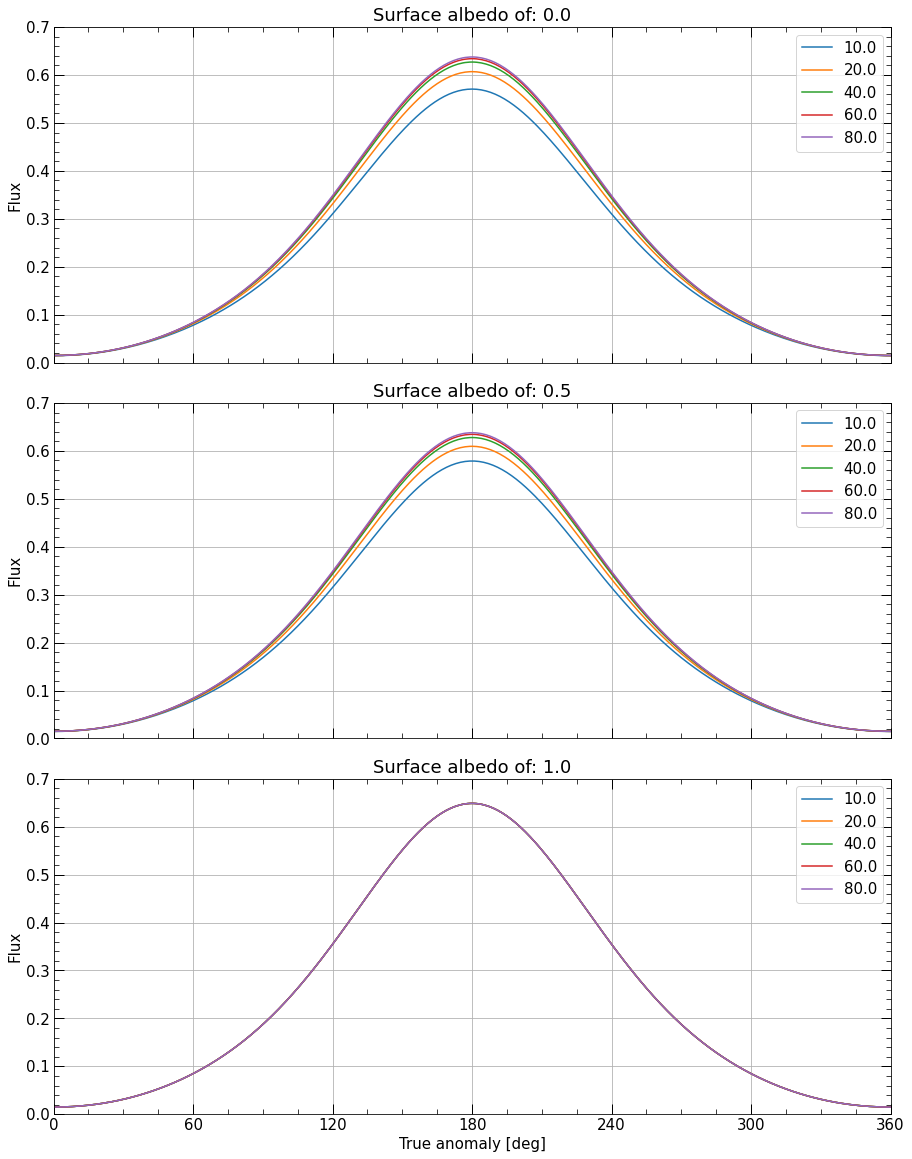

In [108]:
"""
save_dict = {"lambda": true_anomaly, "alpha": alpha, "Stot": Stot,
             "Sp": Sp, "Sr": Sr, "Ptot": Ptot, "Pp": Pp, "Pr": Pr}
"""
planet_o_thickness = np.array(["10.0","20.0","40.0","60.0","80.0"])
planet_s_albedo = np.array(["0.0","0.5","1.0"])

notext = False
fig = plt.figure(figsize=(15,20))
gs = fig.add_gridspec(3, hspace=0.12)
axs = gs.subplots(sharex=True)
# fig.suptitle("Flux curves for different optical thicknessess and surface albedo", y=0.93,fontsize=25)

for ii, s_a in enumerate(planet_s_albedo):
    for jj, p_o in enumerate(planet_o_thickness):
        data_loc = f"/home/allard/Data/bmsca_{p_o}_asurf_Series/bmsca_{p_o}_asurf_{s_a}/"
        data_name = data_loc + f"data_with_bmsca_{p_o}_asurf_{s_a}.pkl"

        with open(data_name,"rb") as f:
            save_file = pickle.load(f)
            
        true_anomaly = np.array(save_file["lambda"])
        alpha = np.array(save_file["alpha"])
        Sp = np.array(save_file["Sp"])
        Pp = np.array(save_file["Pp"])
        flux = Sp[:,0]

        axs[ii].plot(true_anomaly,flux,label=f"{p_o}")
        axs[ii].set_ylabel("Flux")
        axs[ii].legend()
        axs[ii].grid()
        axs[ii].set_title(f"Surface albedo of: {s_a}")
        if ii == 2:
            notext = True
        setup(axs[ii],60,0,360,0.00,0.7,notext=notext)

axs[2].set_xlabel("True anomaly [deg]")
plt.show()

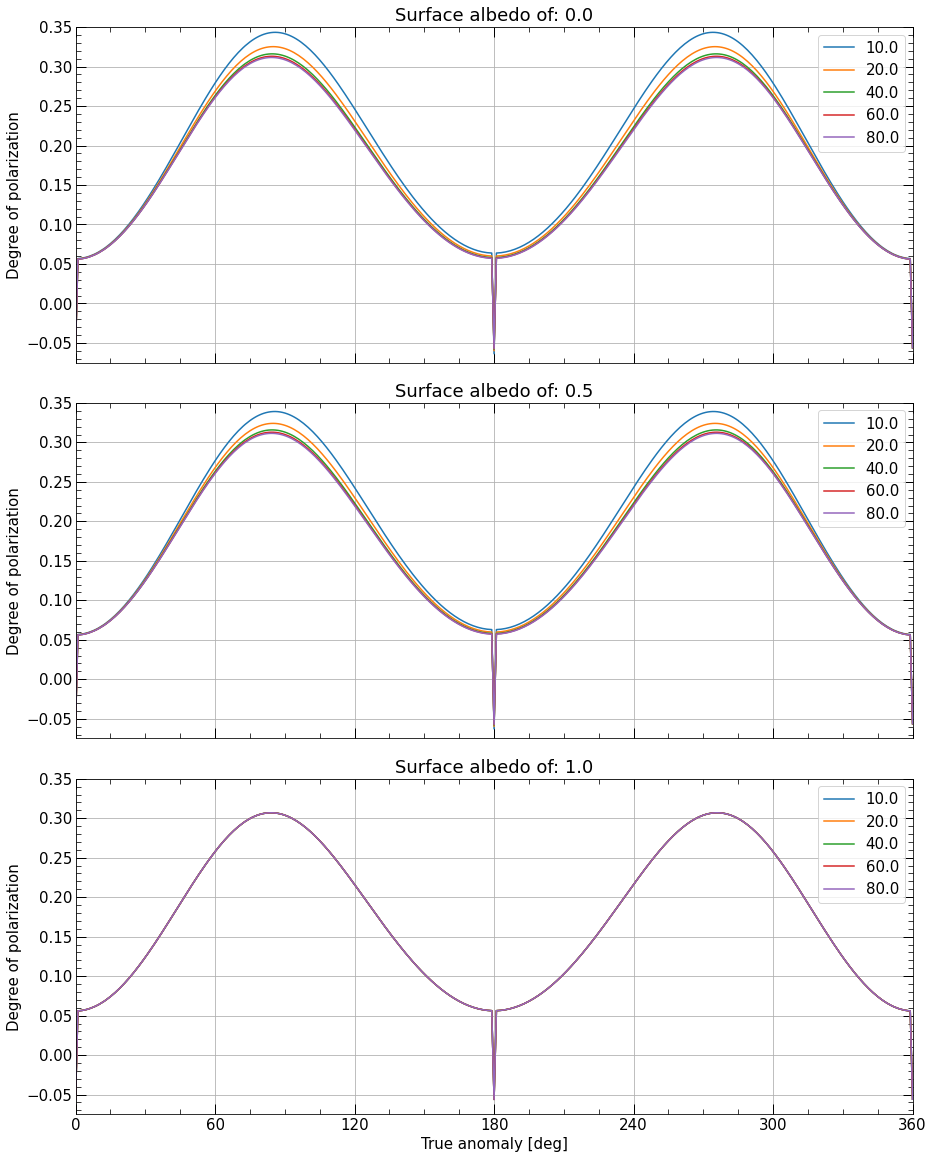

In [110]:
"""
save_dict = {"lambda": true_anomaly, "alpha": alpha, "Stot": Stot,
             "Sp": Sp, "Sr": Sr, "Ptot": Ptot, "Pp": Pp, "Pr": Pr}
"""
planet_o_thickness = np.array(["10.0","20.0","40.0","60.0","80.0"])
planet_s_albedo = np.array(["0.0","0.5","1.0"])

notext = False
fig = plt.figure(figsize=(15,20))
gs = fig.add_gridspec(3, hspace=0.12)
axs = gs.subplots(sharex=True)
# fig.suptitle("Flux curves for different optical thicknessess and surface albedo", y=0.93,fontsize=25)

for ii, s_a in enumerate(planet_s_albedo):
    for jj, p_o in enumerate(planet_o_thickness):
        data_loc = f"/home/allard/Data/bmsca_{p_o}_asurf_Series/bmsca_{p_o}_asurf_{s_a}/"
        data_name = data_loc + f"data_with_bmsca_{p_o}_asurf_{s_a}.pkl"

        with open(data_name,"rb") as f:
            save_file = pickle.load(f)
            
        true_anomaly = np.array(save_file["lambda"])
        alpha = np.array(save_file["alpha"])
        Pp = np.array(save_file["Pp"])

        axs[ii].plot(true_anomaly,Pp,label=f"{p_o}")
        axs[ii].set_ylabel("Degree of polarization")
        axs[ii].legend()
        axs[ii].grid()
        axs[ii].set_title(f"Surface albedo of: {s_a}")
        if ii == 2:
            notext = True
        setup(axs[ii],60,0,360,-0.075,0.35,notext=notext)

axs[2].set_xlabel("True anomaly [deg]")
plt.show()

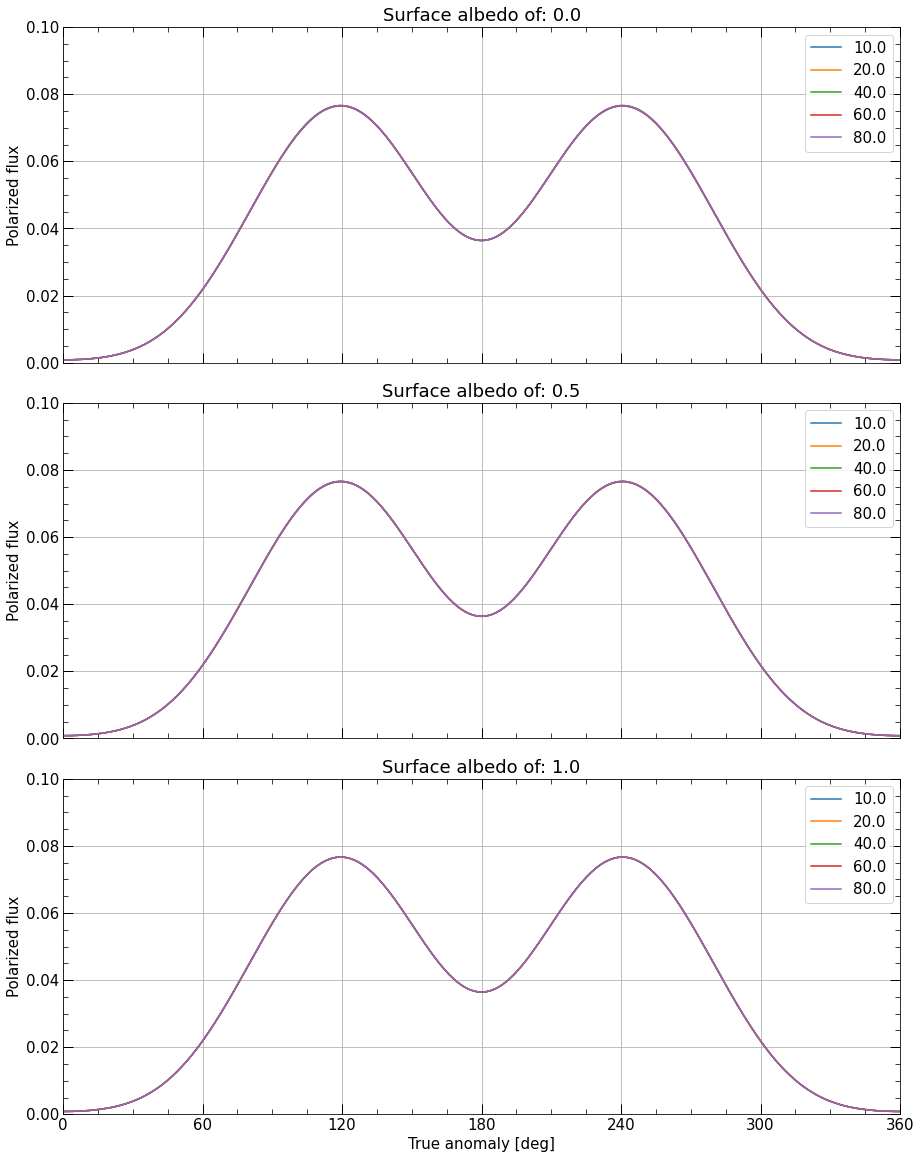

In [112]:
"""
save_dict = {"lambda": true_anomaly, "alpha": alpha, "Stot": Stot,
             "Sp": Sp, "Sr": Sr, "Ptot": Ptot, "Pp": Pp, "Pr": Pr}
"""
planet_o_thickness = np.array(["10.0","20.0","40.0","60.0","80.0"])
planet_s_albedo = np.array(["0.0","0.5","1.0"])

notext = False
fig = plt.figure(figsize=(15,20))
gs = fig.add_gridspec(3, hspace=0.12)
axs = gs.subplots(sharex=True)
# fig.suptitle("Flux curves for different optical thicknessess and surface albedo", y=0.93,fontsize=25)

for ii, s_a in enumerate(planet_s_albedo):
    for jj, p_o in enumerate(planet_o_thickness):
        data_loc = f"/home/allard/Data/bmsca_{p_o}_asurf_Series/bmsca_{p_o}_asurf_{s_a}/"
        data_name = data_loc + f"data_with_bmsca_{p_o}_asurf_{s_a}.pkl"

        with open(data_name,"rb") as f:
            save_file = pickle.load(f)
            
        true_anomaly = np.array(save_file["lambda"])
        alpha = np.array(save_file["alpha"])
        Sp = np.array(save_file["Sp"])
        Pp = np.array(save_file["Pp"])
        Pflux = np.sqrt(Sp[:,1]**2 + Sp[:,2]**2)

        axs[ii].plot(true_anomaly,Pflux,label=f"{p_o}")
        axs[ii].set_ylabel("Polarized flux")
        axs[ii].legend()
        axs[ii].grid()
        axs[ii].set_title(f"Surface albedo of: {s_a}")
        if ii == 2:
            notext = True
        setup(axs[ii],60,0,360,0.0,0.1,notext=notext)

axs[2].set_xlabel("True anomaly [deg]")
plt.show()